<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

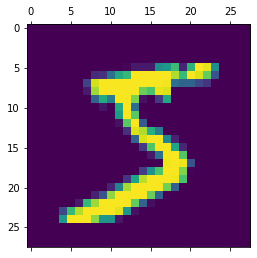

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
X_train_flattened.shape

(60000, 784)

In [9]:
X_test_flattened.shape

(10000, 784)

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
y_train[0]

5

In [13]:
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

In [14]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [15]:
# input is 1D array with 784 inputs so(784,)
# output is 10 numbers with 0-9, so it contain 10 output neurons
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
# prediction without training with random weights intialization
model.predict(X_test_flattened)

array([[0.44884694, 0.48661423, 0.53098255, ..., 0.43050984, 0.39061883,
        0.6384006 ],
       [0.45865095, 0.4643815 , 0.67603374, ..., 0.6991056 , 0.48878092,
        0.6105611 ],
       [0.57363963, 0.56428003, 0.6758419 , ..., 0.6483866 , 0.5710401 ,
        0.5154666 ],
       ...,
       [0.45254955, 0.54959536, 0.71890485, ..., 0.40903193, 0.6061703 ,
        0.63521993],
       [0.47708002, 0.40592778, 0.5786488 , ..., 0.6531041 , 0.41813788,
        0.5565299 ],
       [0.4025977 , 0.4572044 , 0.6282538 , ..., 0.52227527, 0.73123556,
        0.7691155 ]], dtype=float32)

In [18]:
# total params is 784*10 + 10(bias) = 7850

In [18]:
# if output is just an integer number then we use sparse_categorical_crossentropy
# if output is one hot encoded then we use categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(X_train_flattened, y_train, epochs=5)    

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 275us/sample - loss: 0.4894 - accuracy: 0.8781
Epoch 2/5
60000/60000 [==============================] - 15s 244us/sample - loss: 0.3061 - accuracy: 0.9154
Epoch 3/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.2854 - accuracy: 0.9206
Epoch 4/5
60000/60000 [==============================] - 18s 295us/sample - loss: 0.2748 - accuracy: 0.9241
Epoch 5/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.2678 - accuracy: 0.9258


In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.2546778e-05, 0.0000000e+00, 5.4508448e-05, 1.0035187e-02,
       1.1622906e-06, 8.8959932e-05, 0.0000000e+00, 7.0470452e-01,
       7.6949596e-05, 1.0293722e-03], dtype=float32)

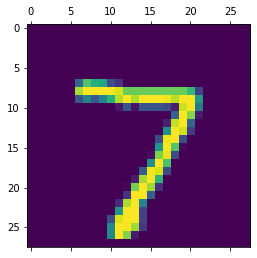

In [30]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [31]:
np.argmax(y_predicted[0])

7

In [23]:
# since y_predicted is decimals we should convert to integers
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: id=34942, shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    1,    2,    0,   11,   11,    2,    3,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    9,  928,   14,    6,    7,   14,    8,   39,    4],
       [   3,    0,   20,  906,    1,   38,    3,    9,   22,    8],
       [   1,    2,    2,    1,  915,    0,   13,    4,    6,   38],
       [   7,    2,    2,   16,    8,  801,   17,    4,   28,    7],
       [   6,    3,    4,    1,    7,   14,  919,    2,    2,    0],
       [   1,    6,   25,    5,    8,    1,    0,  940,    1,   41],
       [   5,    8,    6,   15,    9,   32,   10,   10,  870,    9],
       [   8,    7,    1,   10,   23,   10,    0,   14,    5,  931]])>

Text(69.0, 0.5, 'Truth')

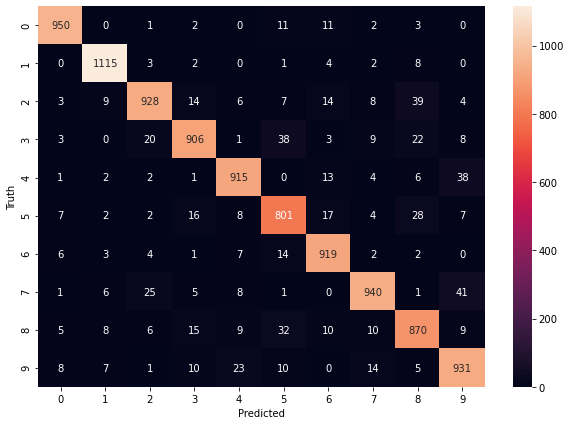

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2878 - accuracy: 0.9197
Epoch 2/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1346 - accuracy: 0.9603
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0957 - accuracy: 0.9716
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0743 - accuracy: 0.9776
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0605 - accuracy: 0.9817


Text(69.0, 0.5, 'Truth')

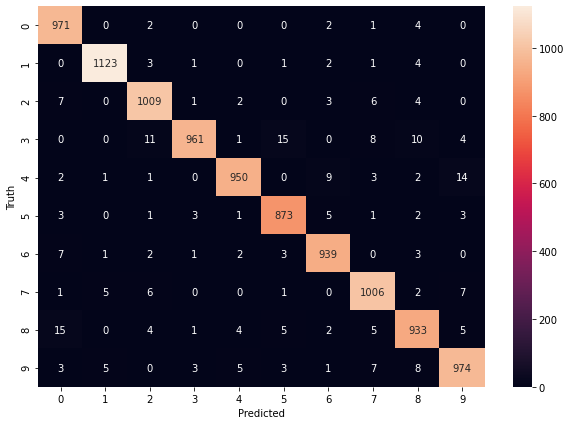

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train/255, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2926 - accuracy: 0.9186
Epoch 2/5
60000/60000 [==============================] - 16s 270us/sample - loss: 0.1386 - accuracy: 0.9601
Epoch 3/5
60000/60000 [==============================] - 18s 300us/sample - loss: 0.1009 - accuracy: 0.9700
Epoch 4/5
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0798 - accuracy: 0.9761
Epoch 5/5
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0636 - accuracy: 0.9806


In [ ]:
model.evaluate(X_test,y_test)